In [0]:
import numpy
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# **Download 訓練資料**

In [0]:
(x_img_train,y_label_train), \
(x_img_test, y_label_test)=cifar10.load_data()

### **看圖檔的類別 (height,width,channels)**

In [40]:
x_img_train.shape 

(50000, 32, 32, 3)

In [41]:
y_label_train.shape

(50000, 1)

In [42]:
x_img_test.shape

(10000, 32, 32, 3)

In [43]:
x_img_test[0]

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67, 110]]

In [44]:
y_label_test.shape

(10000, 1)

In [0]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}  #lable name

In [0]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()  #得到當前的圖檔(fugure)
    fig.set_size_inches(12, 14) #set_size_inches(高,寬) 調整圖檔
    if num>25: num=25 
    # 以下也只是單純畫出plt要顯示的圖檔
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10)  #顯示圖片的title
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show() #結果要show出來

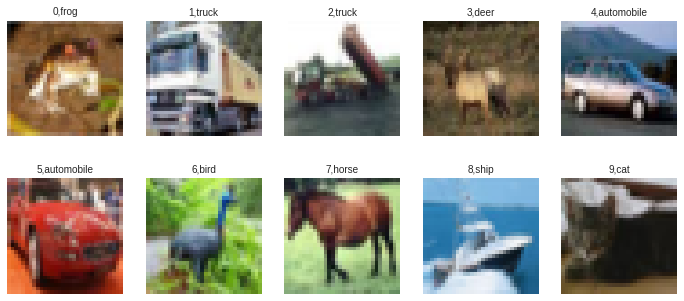

In [47]:
plot_images_labels_prediction(x_img_train,y_label_train,[],0) #結果印出

In [48]:
print('x_img_test:',x_img_test.shape)
print('y_label_test :',y_label_test.shape)

x_img_test: (10000, 32, 32, 3)
y_label_test : (10000, 1)


# **圖檔正規化**

In [49]:
x_img_train[0][0][0] #此image編碼為uint8

array([59, 62, 63], dtype=uint8)

In [0]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0 # astype更改參數
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [51]:
x_img_train_normalize[0][0][0] #查看改過後的參數


array([0.23137255, 0.24313726, 0.24705882], dtype=float32)

# **轉換label 為 OneHot Encoding **

In [52]:
y_label_train.shape

(50000, 1)

In [0]:
y_label_train[:5]

In [0]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [55]:
y_label_train_OneHot.shape

(50000, 10)

In [57]:
y_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)